In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display

mpl.style.use('ggplot')


### The Legion of Evil is the world's #2 most evil organization in the world, but we could be number one!
#### Through tough negotiations and uncomfortable silences, we have been granted a meeting with the #1 most evil organization, the Legion of Doom! This is our chance, recruit, to make it to the big time. Let's not fail now!

#### Let's start by loading in our database and printing the head

In [4]:
marvel = pd.read_csv('./../../assets/datasets/marvel.csv')
marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


#### We have some extra data from our teams in the field about the comings and goings of our heroes in the list. Let's run this once and continue to the next field

In [5]:
def randomly(length):
    return np.random.randint(0, length, size = 1)[0]

def pull_unique(length, arr):
    this_rand = randomly(length)
    while this_rand in arr:
        this_rand = randomly(length)
    return this_rand

def make_week(number):
    return "Week: " + str(number)


columns = 35
weeks = [make_week(x + 1) for x in range(columns)]

activity = ["sleeping","jogging","general tcb(taking care of business)",
            "goat wrangling","birthday party","hopscotch tournament",
           "evil fighting","having conflicting emotions about secret identity",
           "ordering pizza","eating jellybeans","working both sides",
            "being john malkovich","Netflix and chill", "munching on granola",
            "standing silently on one leg", "using powers for good", 
            "extensive pullups","running into walls","creating portals to other dimensions",
           "being really really evil", "insulting children", "stealing puppies from orphanages",
           "masticating", "doing magic tricks", "understanding the world", "Space!!!"]

dicty = {}

for week in weeks:
    dicty[week] = [activity[randomly(len(activity))] for x in range(len(marvel))]

dicty['page_id'] = marvel['page_id']

#### Let's add our new data to a dataframe and print the head

In [6]:
weeks = pd.DataFrame(dicty)
weeks.head()

,Week: 1,Week: 10,Week: 11,Week: 12,Week: 13,Week: 14,Week: 15,Week: 16,Week: 17,Week: 18,...,Week: 33,Week: 34,Week: 35,Week: 4,Week: 5,Week: 6,Week: 7,Week: 8,Week: 9,page_id
0,understanding the world,working both sides,being really really evil,extensive pullups,extensive pullups,jogging,having conflicting emotions about secret identity,general tcb(taking care of business),ordering pizza,hopscotch tournament,...,Space!!!,general tcb(taking care of business),Space!!!,understanding the world,being john malkovich,birthday party,Netflix and chill,hopscotch tournament,hopscotch tournament,1678
1,doing magic tricks,birthday party,using powers for good,ordering pizza,eating jellybeans,goat wrangling,munching on granola,birthday party,ordering pizza,evil fighting,...,stealing puppies from orphanages,doing magic tricks,hopscotch tournament,extensive pullups,creating portals to other dimensions,general tcb(taking care of business),jogging,masticating,being really really evil,7139
2,standing silently on one leg,masticating,being john malkovich,eating jellybeans,stealing puppies from orphanages,being john malkovich,creating portals to other dimensions,using powers for good,understanding the world,understanding the world,...,creating portals to other dimensions,insulting children,working both sides,evil fighting,evil fighting,doing magic tricks,birthday party,creating portals to other dimensions,insulting children,64786
3,hopscotch tournament,jogging,using powers for good,hopscotch tournament,eating jellybeans,goat wrangling,doing magic tricks,working both sides,munching on granola,having conflicting emotions about secret identity,...,jogging,creating portals to other dimensions,being really really evil,masticating,stealing puppies from orphanages,doing magic tricks,goat wrangling,birthday party,hopscotch tournament,1868
4,Space!!!,munching on granola,ordering pizza,general tcb(taking care of business),doing magic tricks,understanding the world,having conflicting emotions about secret identity,goat wrangling,insulting children,eating jellybeans,...,hopscotch tournament,running into walls,jogging,extensive pullups,sleeping,Space!!!,birthday party,ordering pizza,doing magic tricks,2460


#### Let's merge new this DataFrame with our marvel DataFrame

In [7]:
merged = pd.merge(marvel, weeks, how="inner", on="page_id")
display(merged.head())

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,...,Week: 32,Week: 33,Week: 34,Week: 35,Week: 4,Week: 5,Week: 6,Week: 7,Week: 8,Week: 9
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,...,working both sides,Space!!!,general tcb(taking care of business),Space!!!,understanding the world,being john malkovich,birthday party,Netflix and chill,hopscotch tournament,hopscotch tournament
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,...,being john malkovich,stealing puppies from orphanages,doing magic tricks,hopscotch tournament,extensive pullups,creating portals to other dimensions,general tcb(taking care of business),jogging,masticating,being really really evil
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,...,being really really evil,creating portals to other dimensions,insulting children,working both sides,evil fighting,evil fighting,doing magic tricks,birthday party,creating portals to other dimensions,insulting children
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,...,running into walls,jogging,creating portals to other dimensions,being really really evil,masticating,stealing puppies from orphanages,doing magic tricks,goat wrangling,birthday party,hopscotch tournament
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,...,munching on granola,hopscotch tournament,running into walls,jogging,extensive pullups,sleeping,Space!!!,birthday party,ordering pizza,doing magic tricks


#### Let's take a look at our data to see how it came out. General Immortus tells you that "Ormond Wychwood" should be in our database, let's print out his data.

In [8]:
merged[merged['name'].str.contains("Ormond Wychwood")]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,...,Week: 32,Week: 33,Week: 34,Week: 35,Week: 4,Week: 5,Week: 6,Week: 7,Week: 8,Week: 9
1016,84720,Ormond Wychwood (Earth-616),\/Ormond_Wychwood_(Earth-616),Secret Identity,Bad Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,...,extensive pullups,evil fighting,eating jellybeans,standing silently on one leg,general tcb(taking care of business),working both sides,eating jellybeans,Netflix and chill,understanding the world,evil fighting


#### Everything looks good! Next, let's melt our table to find the most popular activity for our heroes by week

In [9]:
merged.ix[:,'Week: 1':]

cheese = pd.melt(merged, id_vars=merged.ix[:,:'Year'].columns.values, var_name = 'week', value_name ='activity')
display(cheese.head())

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,week,activity
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0,Week: 1,understanding the world
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0,Week: 1,doing magic tricks
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0,Week: 1,standing silently on one leg
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0,Week: 1,hopscotch tournament
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0,Week: 1,Space!!!


#### We are concerned about the activities of our valiant evil heroes vs. the unambitious good heroes. Let's print out a pivot table showing the differences. An example table can be found below.

In [10]:
pd.pivot_table(cheese[['ALIGN','activity']],index=['ALIGN'], columns=['activity'],aggfunc=len) 

activity,Netflix and chill,Space!!!,being john malkovich,being really really evil,birthday party,creating portals to other dimensions,doing magic tricks,eating jellybeans,evil fighting,extensive pullups,...,masticating,munching on granola,ordering pizza,running into walls,sleeping,standing silently on one leg,stealing puppies from orphanages,understanding the world,using powers for good,working both sides
ALIGN,,,,,,,,,,,,,,,,,,,,,
Bad Characters,9058,9150,8965,9141,8876,9020,9110,9093,8972,9046,...,8847,9294,8983,8985,9055,9124,8955,8954,9019,8880
Good Characters,6254,6265,6300,6201,6150,6226,6108,6368,6314,6037,...,6235,6307,6264,6157,6324,6203,6271,6380,6237,6174
Neutral Characters,2856,2997,2947,2955,3015,3029,2941,3010,2967,2995,...,3012,2928,2967,2986,2944,2956,2990,3062,2969,3006


#### Are our freedom fighters better at being evil on average? Let's make a boxplot of the number of times each character had an evil action against how they are aligned (evil, neutral, good). You can see a sample of the plot we are looking for below this cell.

In [61]:
evil_activities = ["working both sides","creating portals to other dimensions",
           "being really really evil", "insulting children", "stealing puppies from orphanages"]


mask = cheese['activity'].isin(evil_activities)


new_df = cheese[mask]
new_df

x = pd.pivot_table(new_df[['ALIGN','activity','page_id']], index=['page_id'], columns=['ALIGN'],aggfunc=len) 
x.head()

activity                                   
ALIGN   Bad Characters Good Characters Neutral Characters
page_id                                                  
1025              10.0             NaN                NaN
1027               5.0             NaN                NaN
1029               NaN             8.0                NaN
1030               NaN             7.0                NaN
1032               7.0             NaN                NaN

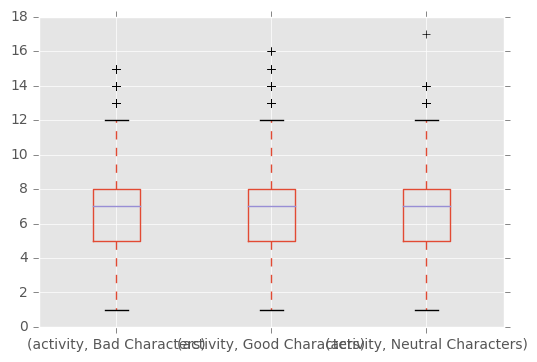

In [12]:
x.plot(kind = "box")
plt.show()

#### Now let's make a bar graph with pandas with the averages of the sum totals (evil / all activites) for our alignments. Which alignment on average was the most evil? Don't forget to give your chart a title and label your axis' recruits!

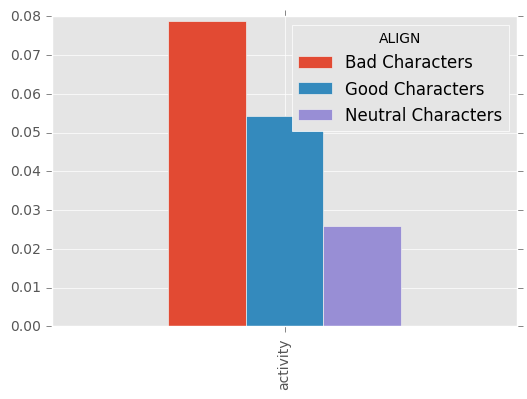

In [63]:
#sum thing
y = pd.pivot_table(new_df[['ALIGN','activity']], columns=['ALIGN'],aggfunc=len)
lst = y.columns.values

total = len(cheese['activity'])

#get the avg
for x in lst:
    y[x] = y[x] / float(total)

y.plot(kind = 'bar')
plt.show()

![Bar](./../../assets/plot_2.png "Bar")

#### Lex Luther ([Enterprising Leader of the Legion Of Doom](https://en.wikipedia.org/wiki/Legion_of_Doom_(DC_Comics)) has contracted you on one last personal project: To engineer a unique, cutting-edge slideshow for the lobby of the Legion of Doom! Here are the steps needed to complete the task.

* Replace each of your heroes activities with numbers denoting their alignment
    * 1 = good
    * -1 = evil
    * 0 = neutral (all activities not in good_activity or evil_activity lists)
* Pick a random hero from your dataset
* Plot his evilness/goodness over time with a line graph
* Make sure to print his name at the top of the graph and label your x and y axis!

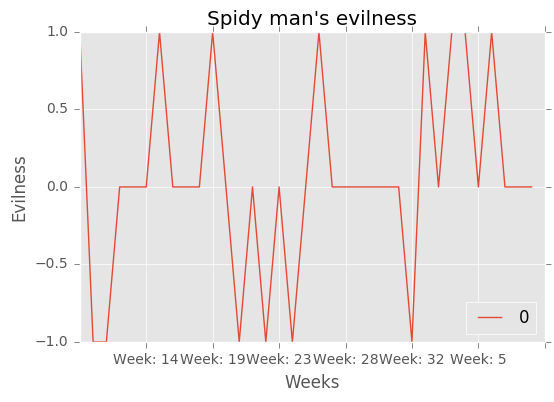

In [60]:
good_activity = ["birthday party","evil fighting",
                 "having conflicting emotions about secret identity",
           "using powers for good", "understanding the world", "Space!!!"]

spider_man = merged.head(1).ix[:,'Week: 1':].T

spider_man.replace(good_activity,1,inplace = True)
spider_man.replace(evil_activities,-1,inplace = True)
spider_man[spider_man.ix[:,0] > 1] = 0

#display(spider_man)
    
ax = spider_man.plot(title = "Spidy man's evilness", kind = 'line')
ax.set_xlabel("Weeks")
ax.set_ylabel("Evilness")
plt.show()

![Bar](./../../assets/plot_3.png "Bar")